# 10. Bayesian_Regression |  15/09/2023

## SMAIL Aghilas

#### La régression bayésienne est une méthode statistique qui combine les principes de la régression linéaire avec les concepts de la théorie bayésienne. n utilise des distributions de probabilité pour représenter nos croyances initiales sur les paramètres du modèle, appelées "priors". Ensuite, à mesure que de nouvelles données sont observées, ces croyances sont mises à jour en utilisant le théorème de Bayes, pour obtenir des distributions de probabilité actualisées, appelées "posteriors". Ces posteriors fournissent une estimation probabiliste des paramètres du modèle.

 ### 1 - En import les module nécessaire pour faire tourner l'algorithme.

l'algorithme de regression qui est utiliser par scikit-learn

In [1]:
from sklearn import linear_model
X = [[0., 0.], [1., 1.], [2., 2.], [3., 3.]]
Y = [0., 1., 2., 3.]
reg = linear_model.BayesianRidge()
reg.fit(X, Y)

BayesianRidge()

In [2]:
reg.predict([[1, 0.]])

array([0.50000013])

In [3]:
reg.coef_

array([0.49999993, 0.49999993])

In [4]:
import numpy as np
import pandas as pd

#Data visualization package pour Python pour de la visualisation 
import arviz as az
import matplotlib.pyplot as plt #pour visualiser les graphe 

import pymc3 as pm #Bayesian package for Python
import aesara

* Modifier quelque detaille sur notre envirement de travaille.

In [5]:
seed = 0
rng = np.random.default_rng(seed)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

 ### 2 - géneration de quelque data et la fonction la  plus populaire pour la Bayesian_regression.

In [6]:
size = 200 # On va essai de génerer 200 point de data pour notre model.

x  = np.linspace(0, 1, size) # Nous données seront stocké entre 0 et 1 dans l'axe de X.
xb = 1 + 2 * x # En appliquant la regression linnear en calcul un autre array.
y  = 1 + 2 * x + np.random.normal(scale=1, size=size)

data = pd.DataFrame(dict(x=x, y=y))
print(data)

            x         y
0    0.000000  1.426548
1    0.005025  0.230458
2    0.010050  1.497086
3    0.015075  1.643090
4    0.020101  1.827482
..        ...       ...
195  0.979899  3.238102
196  0.984925  3.719130
197  0.989950  4.716456
198  0.994975  3.619377
199  1.000000  2.980217

[200 rows x 2 columns]


 ### 3 - En va afficher les données que en a génrer grace a librairie de matplotlib

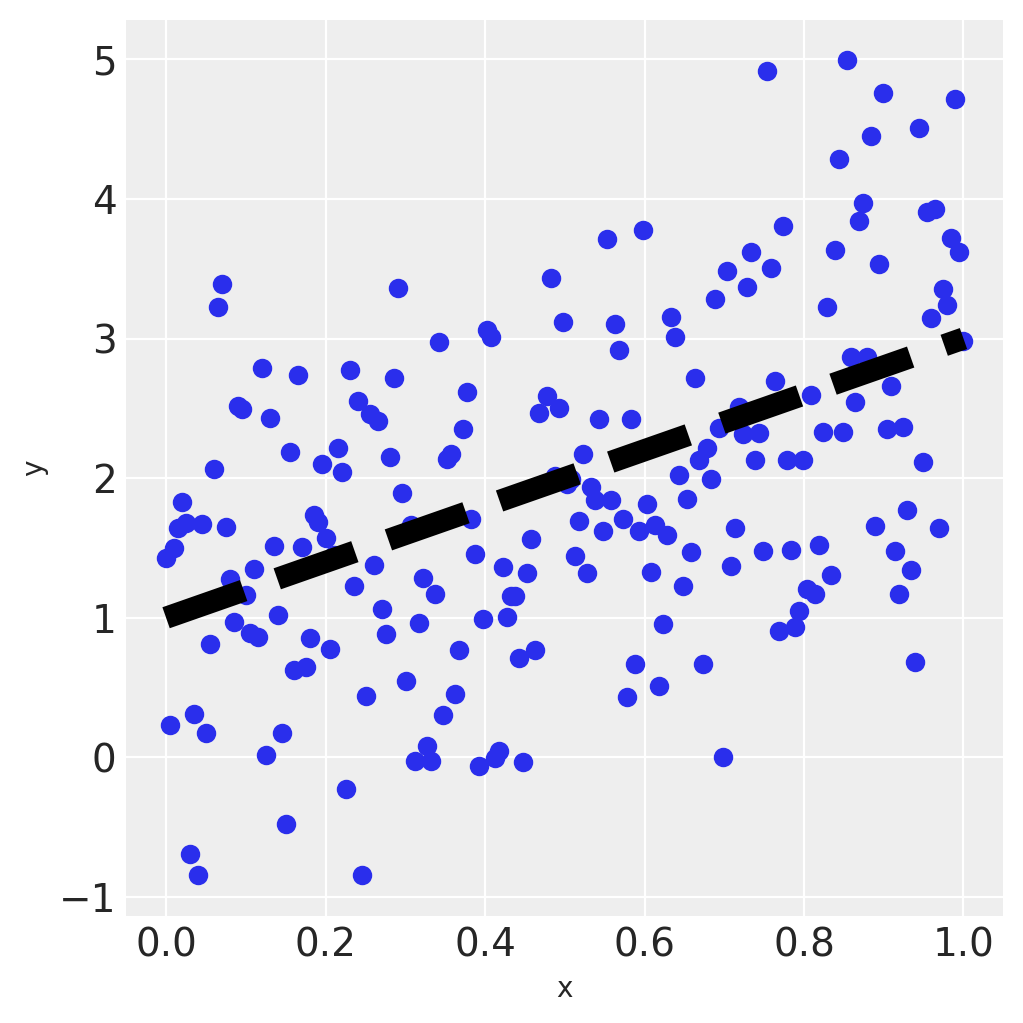

In [7]:
fig = plt.figure(figsize=(5,5)) #la taille de notre graphe

plt.scatter(x,y, label="données")
plt.plot(x,xb, label="regression line", c="black", lw="8", linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

 ### 4 - Définir l'a priori, la vraisemblance et calculer l'a posteriori

#### Dans ce code en utilise défferent étape:
   1- création d'un model PyMC3.
   
   2- Définisser un prior pour l'écart type 'sigma' qui modélise la distribution des résidus
   
   3- définission un prior pour l'intercept de notre model linéare.
   
   4- définission un prior pour la variable indépendant x
   
   5- On essai de générer 10000 échantillons.

In [19]:
with pm.Model() as model:  # model specifications in PyMC3 are wrapped in a with-statement
    
    # Define priors
    sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
    intercept = pm.Normal("Intercept", 0, sigma=20)
    x_coeff = pm.Normal("x", 0, sigma=20)

    # Define likelihood
    likelihood = pm.Normal("y", mu=intercept + x_coeff * x, sigma=sigma, observed=y)

    # Inference
    trace = pm.sample(10000, cores=16, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (16 chains in 16 jobs)
NUTS: [x, Intercept, sigma]


Sampling 16 chains for 1_000 tune and 10_000 draw iterations (16_000 + 160_000 draws total) took 96 seconds.
The acceptance probability does not match the target. It is 0.8793126293745667, but should be close to 0.8. Try to increase the number of tuning steps.


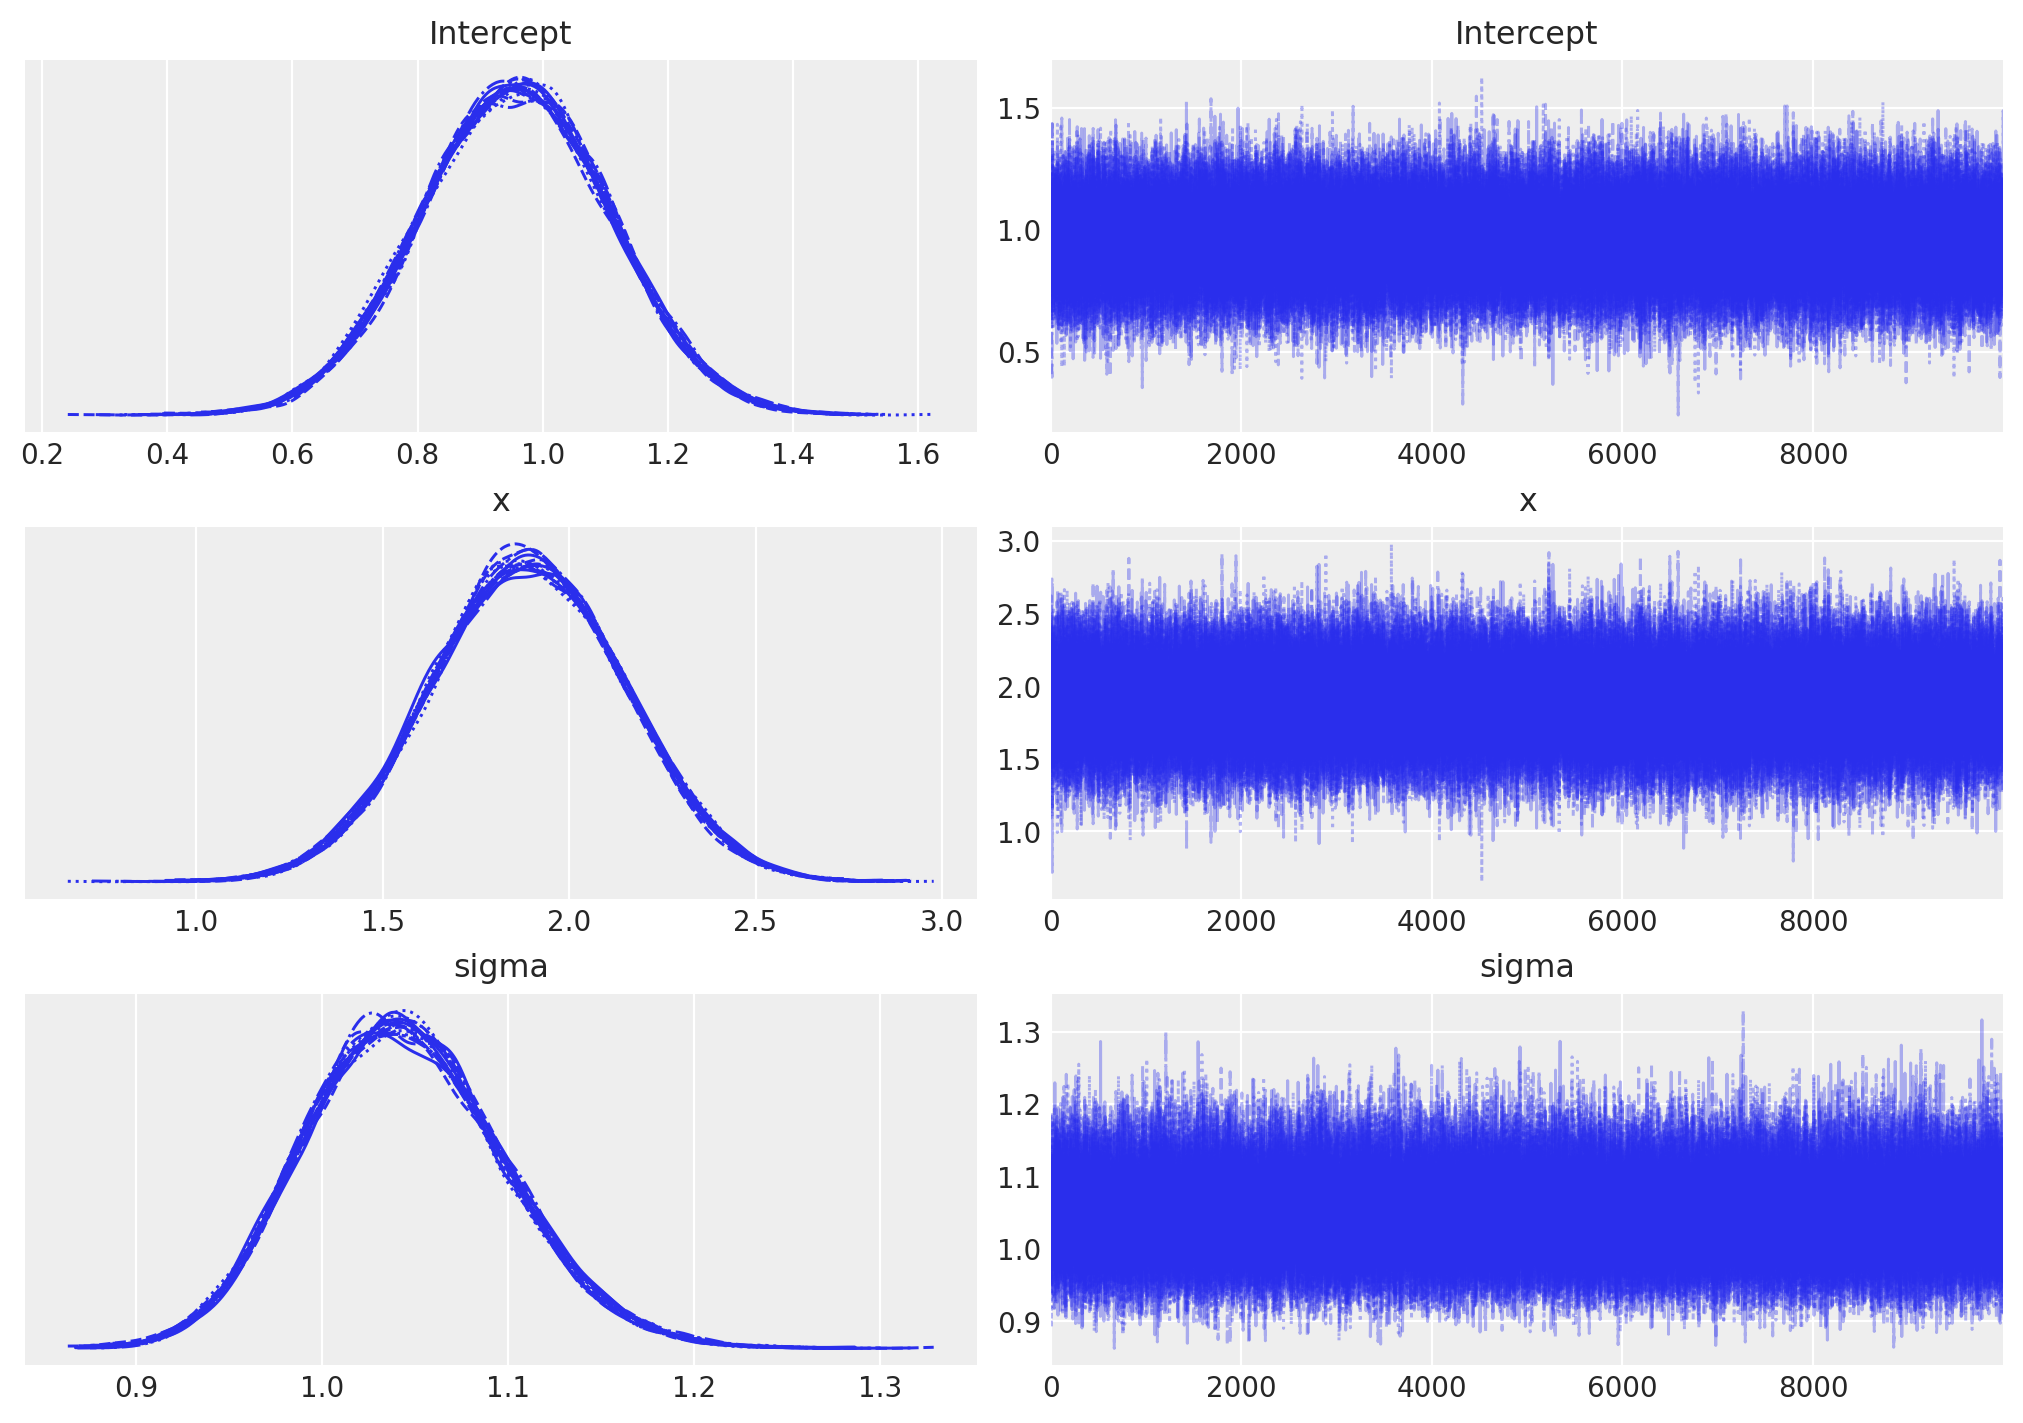

In [20]:
az.plot_trace(trace, figsize=(10, 7));

 ### 5 - afficher le plot de Bayesian regression

Dans de code on affiche les 2 regression normal et celle de bayésienne.

/amuhome/s21219997/.local/lib/python3.10/site-packages/pymc3/plots/posteriorplot.py:59: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  warnings.warn(


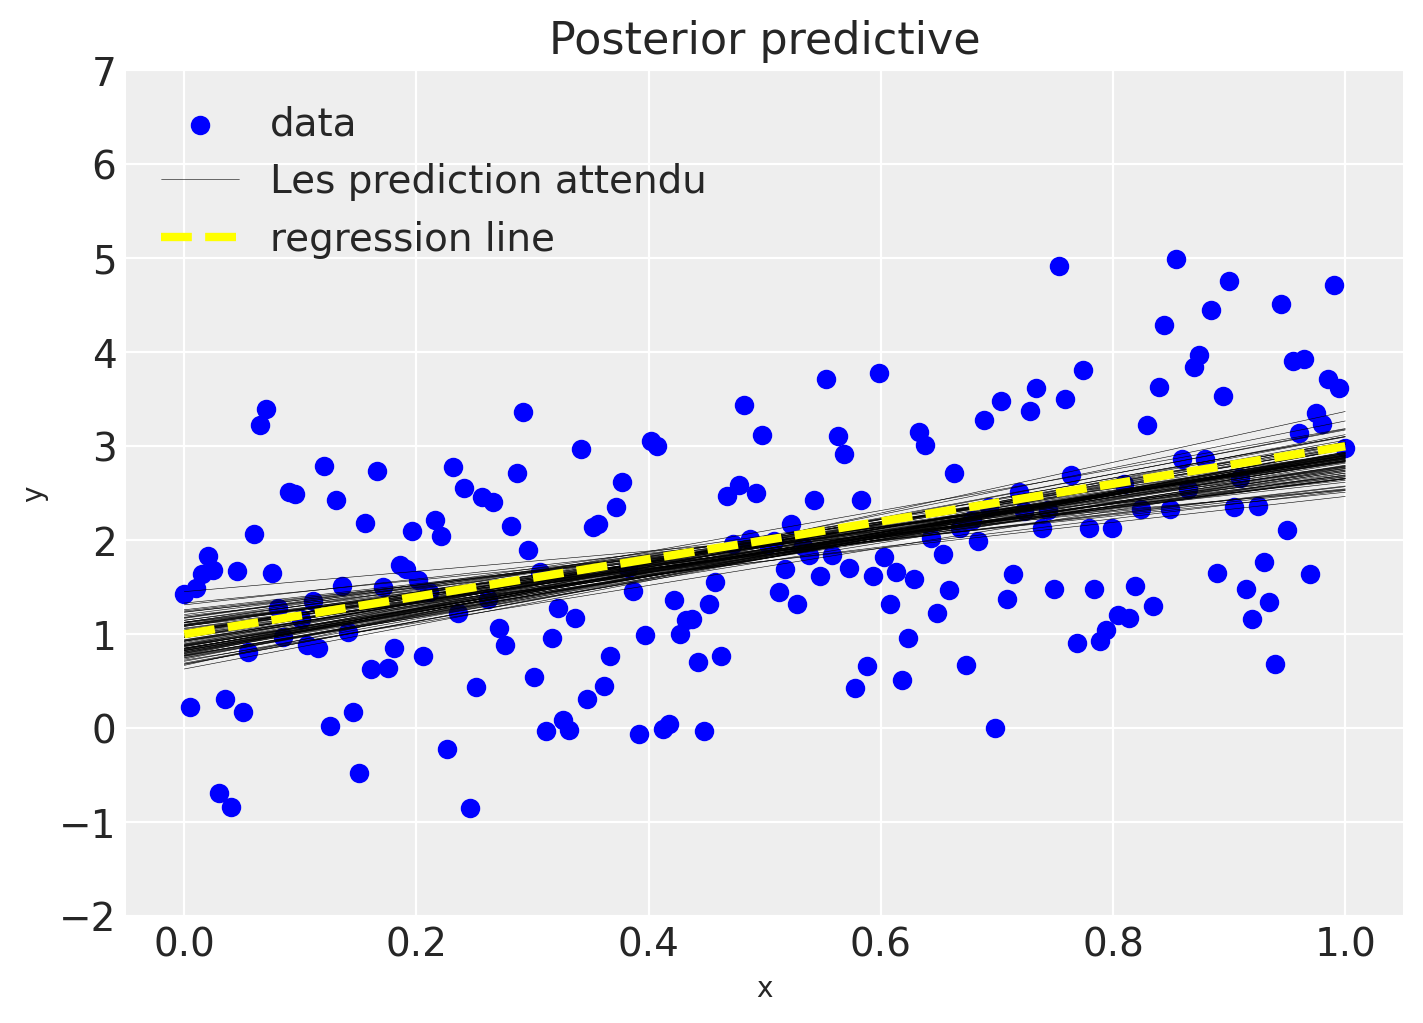

In [23]:
plt.figure(figsize=(7,5))
plt.scatter(x,y,c='blue', label="data")
pm.plot_posterior_predictive_glm(trace, samples = 100, label = "Les prediction attendu")

plt.plot(x, xb, label="regression line", lw=3.0, c="Yellow", linestyle='dashed')

plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-2,7)

plt.legend()
plt.show()